In [4]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

%matplotlib inline

In [5]:
load_dotenv()

True

In [6]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [7]:
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}") 

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [8]:
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [101]:
today = pd.Timestamp("2016-11-01", tz="America/New_York").isoformat()

In [102]:
tickers = ["ACB", "AMRS", "APHA", "CGC", "CRON", "GRWG", "GWPH", "IIPR", "OGI", "SNDL", "TLRY"]

In [103]:
timeframe = "1D"

In [104]:
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
 
).df

df_portfolio
df_portfolio.columns = ['ACB open', 'ACB high', 'ACB low', 'ACB close', 'ACB volume', 'AMRS open', 'AMRS high', 'AMRS low', 'AMRS close', 'AMRS volume', 'APHA open', 'APHA high', 'APHA low', 'APHA close', 'APHA volume', 'CGC open', 'CGC high', 'CGC low', 'CGC close', 'CGC volume', 'CRON open', 'CRON high', 'CRON low', 'CRON close', 'CRON volume', 'GRWG open', 'GRWG high', 'GRWG low', 'GRWG close', 'GRWG volume', 'GWPH open', 'GWPH high', 'GWPH low', 'GWPH close', 'GWPH volume', 'IIPR open', 'IIPR high', 'IIPR low', 'IIPR close', 'IIPR volume', 'OGI open','OGI high', 'OGI low', 'OGI close', 'OGI volume', 'SNDL open', 'SNDL high', 'SNDL low', 'SNDL close', 'SNDL volume', 'TLRY open', 'TLRY high', 'TLRY low', 'TLRY close', 'TLRY volume']

df_closing_prices = df_portfolio[['ACB close', 'AMRS close', 'APHA close', 'CGC close', 'CRON close', 'GRWG close', 'GWPH close', 'IIPR close', 'OGI close', 'SNDL close', 'TLRY close']]
df_closing_prices.index = df_closing_prices.index.date
df_closing_prices

,ACB close,AMRS close,APHA close,CGC close,CRON close,GRWG close,GWPH close,IIPR close,OGI close,SNDL close,TLRY close
2016-11-01,NaN,15.750,2.9200,NaN,NaN,NaN,116.3800,NaN,NaN,NaN,NaN
2016-11-02,NaN,231.750,2.8116,NaN,NaN,NaN,113.3800,NaN,NaN,NaN,NaN
2016-11-03,NaN,173.250,2.8288,NaN,NaN,NaN,111.5200,NaN,NaN,NaN,NaN
2016-11-04,NaN,180.000,2.8307,NaN,NaN,5.00,114.9500,NaN,NaN,NaN,NaN
2016-11-07,NaN,173.250,2.9638,NaN,NaN,NaN,119.2299,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-10-27,3.990,2.815,4.6800,18.66,5.57,17.84,90.6200,121.71,1.2100,0.1703,5.5850
2020-10-28,3.840,2.690,4.4369,18.34,5.48,16.50,88.6700,121.37,1.1850,0.1609,5.6500
2020-10-29,4.090,2.650,4.4900,18.78,5.57,17.18,89.2600,119.93,1.2200,0.1576,5.9600
2020-10-30,4.050,2.490,4.4950,18.78,5.29,16.71,89.9100,116.63,1.1933,0.1445,5.7100


In [105]:
df_daily_returns = df_closing_prices.pct_change()

df_daily_returns

,ACB close,AMRS close,APHA close,CGC close,CRON close,GRWG close,GWPH close,IIPR close,OGI close,SNDL close,TLRY close
2016-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-02,NaN,13.714286,-0.037123,NaN,NaN,NaN,-0.025778,NaN,NaN,NaN,NaN
2016-11-03,NaN,-0.252427,0.006118,NaN,NaN,NaN,-0.016405,NaN,NaN,NaN,NaN
2016-11-04,NaN,0.038961,0.000672,NaN,NaN,NaN,0.030757,NaN,NaN,NaN,NaN
2016-11-07,NaN,-0.037500,0.047020,NaN,NaN,0.000000,0.037233,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-10-27,-0.093182,-0.017452,0.021834,0.007016,0.007233,-0.006831,-0.016283,-0.000246,-0.008197,-0.018444,-0.044482
2020-10-28,-0.037594,-0.044405,-0.051944,-0.017149,-0.016158,-0.075112,-0.021518,-0.002794,-0.020661,-0.055197,0.011638
2020-10-29,0.065104,-0.014870,0.011968,0.023991,0.016423,0.041212,0.006654,-0.011865,0.029536,-0.020510,0.054867
2020-10-30,-0.009780,-0.060377,0.001114,0.000000,-0.050269,-0.027357,0.007282,-0.027516,-0.021885,-0.083122,-0.041946


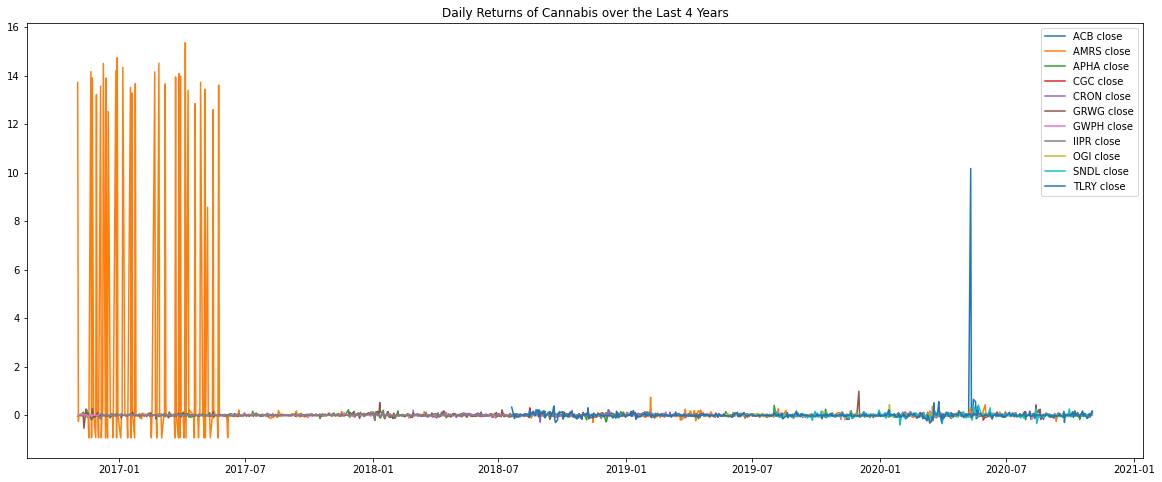

In [111]:
df_daily_returns.plot(title="Daily Returns of Cannabis over the Last 4 Years", figsize=(20,8))